In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from utils.prepare_input_for_embedding import read_df

In [3]:
data_path = "./data/"
pred_path = "./preds/"
cpu_filename1 = "cpu_slzq0b.csv"
pred_filename1 = "pred_slzq0b_2017-12-12.csv"

In [5]:
cpu_filename2 = "cpu_slz8zy.csv"
pred_filename2 = "pred_slz8zy_2017-12-12.csv"

In [6]:
def rmspe(y_pred, y_true):
    """Compute root-mean-squared percent error"""

    pct_var = (y_true - y_pred)/y_true
    return math.sqrt(np.square(pct_var).mean())

## RESULTS : DEV VM SLZQ0B

In [33]:
real = read_df(data_path, cpu_filename1)

In [39]:
real = real.loc[:"2017-12-12"]

In [40]:
#real.to_csv("real_slzq0b_2017-12-1.csv")

In [41]:
pred = pd.read_csv(pred_path + pred_filename1, index_col=0, header=None)

In [44]:
start = str(pred.iloc[0].name)
end = str(real.iloc[-1].name)

In [45]:
start

'2017-12-12 00:00:00'

In [46]:
end

'2017-12-12 23:00:00'

In [47]:
rmspe(pred.loc[start:end].values, real.loc[start:end].values)

0.2850383058225002

In [48]:
pred.reset_index(inplace=True)
pred.columns = ["datetime", "pred"]
pred.datetime = pd.to_datetime(pred.datetime)
pred = pred.sort_values("datetime")
pred.set_index("datetime", inplace=True)

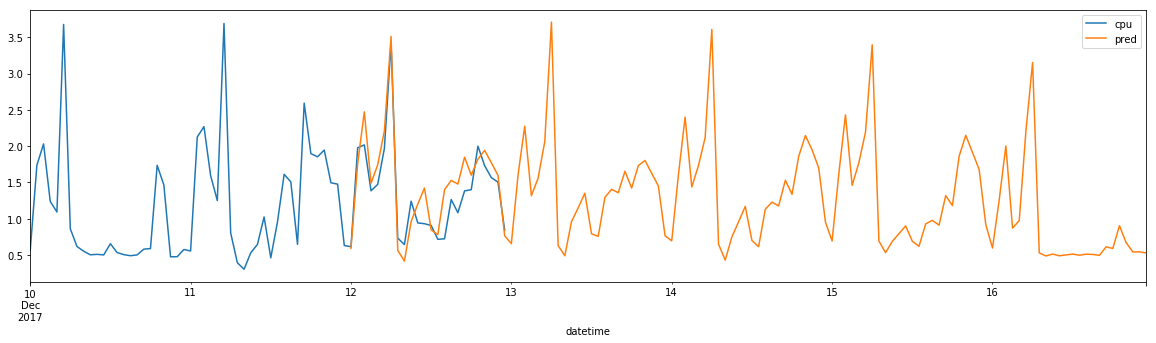

In [49]:
pd.concat([real, pred], axis=1).loc["2017-12-10 00:00:00":].plot(figsize=(20, 5))

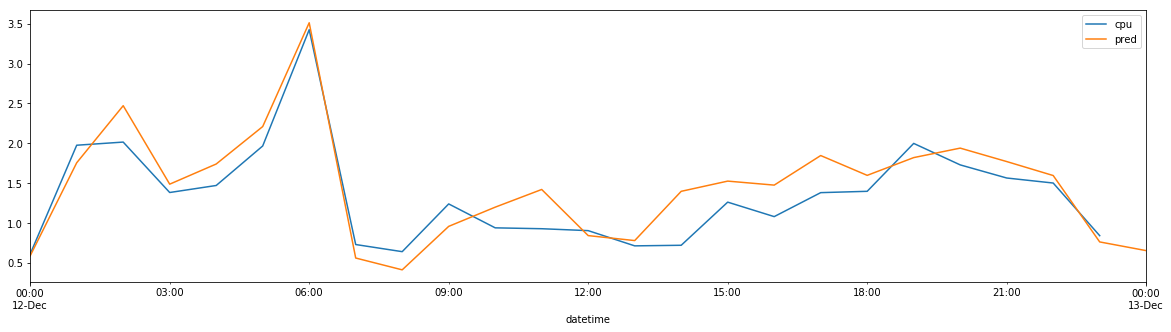

In [51]:
pd.concat([real, pred], axis=1).loc["2017-12-12 00:00:00":"2017-12-13 00:00:00"].plot(figsize=(20, 5))

## RESULTS : PROD VM SLZ8ZY

In [52]:
real = read_df(data_path, cpu_filename2)
pred = pd.read_csv(pred_path + pred_filename2, index_col=0, header=None)

In [16]:
real.to_csv("real_slz8zy_2017-12-13.csv")

In [53]:
real = real.loc[:"2017-12-12"]

In [54]:
start = str(pred.iloc[0].name)
end = str(real.iloc[-1].name)

In [55]:
rmspe(pred.loc[start:end].values, real.loc[start:end].values)

0.2800316930287454

In [56]:
pred.reset_index(inplace=True)
pred.columns = ["datetime", "pred"]
pred.datetime = pd.to_datetime(pred.datetime)
pred = pred.sort_values("datetime")
pred.set_index("datetime", inplace=True)

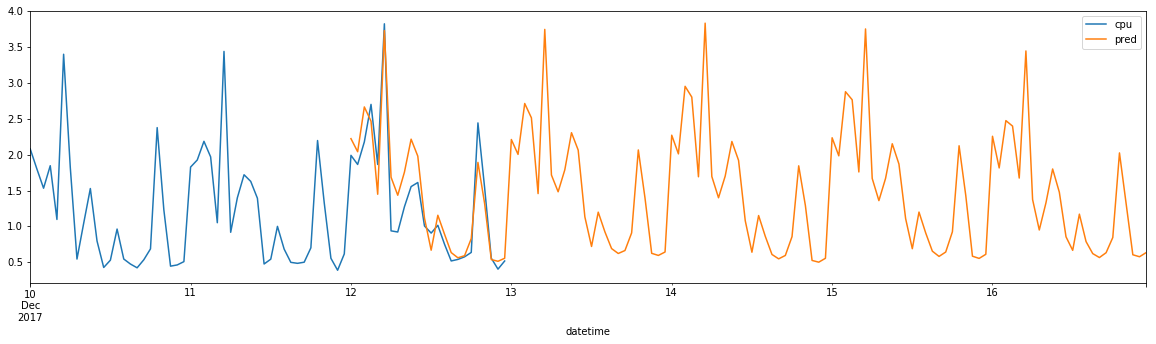

In [57]:
pd.concat([real, pred], axis=1).loc["2017-12-10 00:00:00":].plot(figsize=(20, 5))

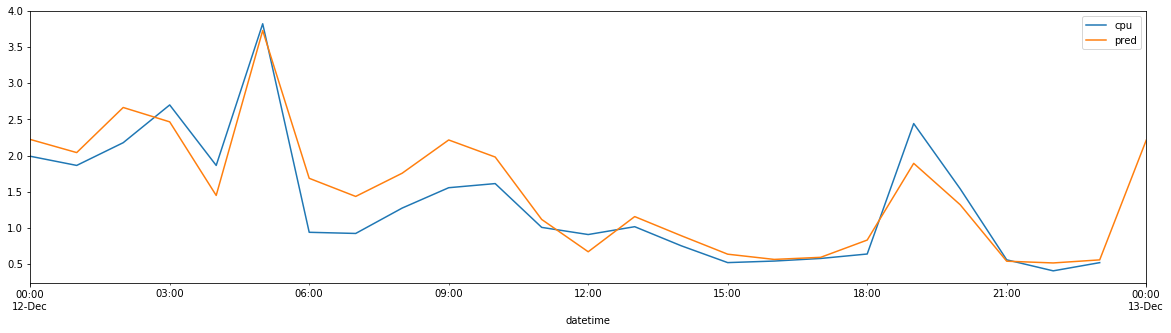

In [59]:
pd.concat([real, pred], axis=1).loc["2017-12-12 00:00:00":"2017-12-13 00:00:00"].plot(figsize=(20, 5))